In [1]:
pip install nltk spacy pandas matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install nltk

In [3]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Set NLTK data path
nltk.data.path.append('path_to_nltk_data_directory')



In [29]:


# Load the dataset
data = pd.read_csv(r'C:\Users\aishwarya\OneDrive\Desktop\Data Science\ML\Virtual_Vigilantes\customer reviews.csv')

# Display the first few rows to understand the structure
print(data.head())


   Sno        book name                                       review title  \
0    0  The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1    1  The Woman in Me                         What a heartbreaking story   
2    2  The Woman in Me  Britney you are so invincible! You are an insp...   
3    3  The Woman in Me                               Fast Read, Sad Story   
4    4  The Woman in Me                       Buy it, it’s worth the read!   

           reviewer  reviewer rating  \
0  Murderess Marbie                4   
1               L J                5   
2             Jamie                5   
3               KMG                5   
4   Stephanie Brown                5   

                                  review description  is_verified        date  \
0  I'm only a third way in. Shipped lightening fa...         True  26-10-2023   
1  "There have been so many times when I was scar...         True  06-11-2023   
2  The media could not be loaded. I personally 

In [30]:


# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to your dataset
data['cleaned_text'] = data['review title'].apply(preprocess_text)


In [22]:
!python -m spacy download en_core_web_sm


                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 330.3 kB/s eta 0:00:39
                                             0.1/12.8 MB 409.6 kB/s eta 0:00:32
                                             0.1/12.8 MB 438.1 kB/s eta 0:00:30
                                             0.1/12.8 MB 516.7 kB/s eta 0:00:25
                                             0.2/12.8 MB 583.1 kB/s eta 0:00:22
                                             0.3/12.8 MB 811.7 kB/s eta 0:00:16
     -                                       0.3/12.8 MB 912.8 kB/s eta 0:00:14
     -                                        0.4/12.8 MB 1.0 MB/s eta 0:00:13
     -                                        0.5/12.8 MB 1.0 MB/s eta 0:00:12
     -                                        0.6/12.8 MB 1.2 MB/s eta 0:00:11
     -                                        0.6/12.8 MB 1

In [31]:
import spacy

# Load the 'en_core_web_sm' model
nlp = spacy.load('en_core_web_sm')

# Text preprocessing function
def preprocess_text_spacy(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    return tokens

# Apply preprocessing to your dataset
data['cleaned_text_spacy'] = data['review title'].apply(preprocess_text_spacy)

In [32]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
data['sentiment_scores'] = data['review title'].apply(lambda x: sid.polarity_scores(x))

# Display the first few rows to check the sentiment scores
print(data[['review title', 'sentiment_scores']].head())

                                        review title  \
0   Unbelievably impressive. Her torn life on paper.   
1                         What a heartbreaking story   
2  Britney you are so invincible! You are an insp...   
3                               Fast Read, Sad Story   
4                       Buy it, it’s worth the read!   

                                    sentiment_scores  
0  {'neg': 0.209, 'neu': 0.461, 'pos': 0.331, 'co...  
1  {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'comp...  
3  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...  
4  {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...  


In [34]:
# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review title'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}")
        print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

n_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
display_topics(lda, feature_names, n_top_words)

Topic #0
['book', 'my', 'it', 'this', 'fun', 'the', 'favorite', 'loved', 'beautiful', 'and']
Topic #1
['of', 'gift', 'to', 'one', 'the', 'and', 'sweet', 'good', 'excellent', 'what']
Topic #2
['cute', 'book', 'the', 'of', 'and', 'story', 'in', 'but', 'little', 'you']
Topic #3
['great', 'for', 'book', 'the', 'of', 'to', 'and', 'story', 'good', 'but']
Topic #4
['read', 'love', 'book', 'this', 'it', 'and', 'to', 'the', 'is', 'you']


<Axes: >

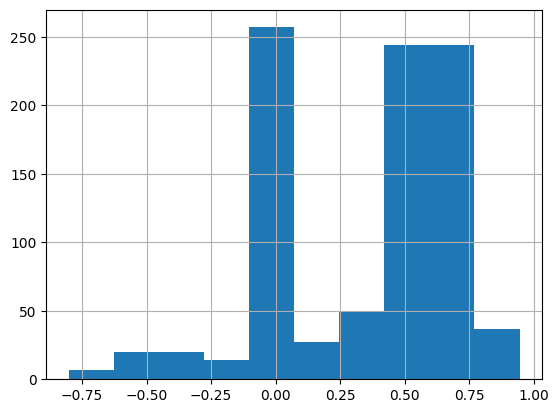

In [35]:
# Visualize sentiment distribution
data['sentiment_scores'].apply(lambda x: x['compound']).hist()

# Plot topic distribution
# (This would depend on how you store and organize the topic modeling results)
